##Object Detection using pretrained model SSDLite_MobileNetv2_COCO
###Dr. Trung T. Nguyen

In the second part, we will use pre-trained **ssdlite_mobilenet_v2_coco** model from Tensorflow detection models zoo to do objects detection on the photos.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import cv2
import math
from PIL import Image
from google.protobuf import text_format

In [3]:
# Loads the module from internet, unpacks it and initializes a Tensorflow saved model.
def load_model(model_name):
    model_url = 'http://download.tensorflow.org/models/object_detection/' + model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(
        fname=model_name,
        origin=model_url,
        untar=True,
        cache_dir=pathlib.Path('.tmp').absolute()
    )
    model = tf.saved_model.load(model_dir + '/saved_model')
    return model

MODEL_NAME = 'ssdlite_mobilenet_v2_coco_2018_05_09'
saved_model = load_model(MODEL_NAME)

51025348/51025348 [==============================] - 1s 0us/step


In [4]:
# Loading default model signature.
model = saved_model.signatures['serving_default']

In [5]:
# -*- coding: utf-8 -*-
# Generated by the protocol buffer compiler.  DO NOT EDIT!
# source: object_detection/protos/string_int_label_map.proto

from google.protobuf import descriptor as _descriptor
from google.protobuf import message as _message
from google.protobuf import reflection as _reflection
from google.protobuf import symbol_database as _symbol_database
# @@protoc_insertion_point(imports)

_sym_db = _symbol_database.Default()




DESCRIPTOR = _descriptor.FileDescriptor(
  name='object_detection/protos/string_int_label_map.proto',
  package='object_detection.protos',
  syntax='proto2',
  serialized_options=None,
  serialized_pb=b'\n2object_detection/protos/string_int_label_map.proto\x12\x17object_detection.protos\"G\n\x15StringIntLabelMapItem\x12\x0c\n\x04name\x18\x01 \x01(\t\x12\n\n\x02id\x18\x02 \x01(\x05\x12\x14\n\x0c\x64isplay_name\x18\x03 \x01(\t\"Q\n\x11StringIntLabelMap\x12<\n\x04item\x18\x01 \x03(\x0b\x32..object_detection.protos.StringIntLabelMapItem'
)




_STRINGINTLABELMAPITEM = _descriptor.Descriptor(
  name='StringIntLabelMapItem',
  full_name='object_detection.protos.StringIntLabelMapItem',
  filename=None,
  file=DESCRIPTOR,
  containing_type=None,
  fields=[
    _descriptor.FieldDescriptor(
      name='name', full_name='object_detection.protos.StringIntLabelMapItem.name', index=0,
      number=1, type=9, cpp_type=9, label=1,
      has_default_value=False, default_value=b"".decode('utf-8'),
      message_type=None, enum_type=None, containing_type=None,
      is_extension=False, extension_scope=None,
      serialized_options=None, file=DESCRIPTOR),
    _descriptor.FieldDescriptor(
      name='id', full_name='object_detection.protos.StringIntLabelMapItem.id', index=1,
      number=2, type=5, cpp_type=1, label=1,
      has_default_value=False, default_value=0,
      message_type=None, enum_type=None, containing_type=None,
      is_extension=False, extension_scope=None,
      serialized_options=None, file=DESCRIPTOR),
    _descriptor.FieldDescriptor(
      name='display_name', full_name='object_detection.protos.StringIntLabelMapItem.display_name', index=2,
      number=3, type=9, cpp_type=9, label=1,
      has_default_value=False, default_value=b"".decode('utf-8'),
      message_type=None, enum_type=None, containing_type=None,
      is_extension=False, extension_scope=None,
      serialized_options=None, file=DESCRIPTOR),
  ],
  extensions=[
  ],
  nested_types=[],
  enum_types=[
  ],
  serialized_options=None,
  is_extendable=False,
  syntax='proto2',
  extension_ranges=[],
  oneofs=[
  ],
  serialized_start=79,
  serialized_end=150,
)


_STRINGINTLABELMAP = _descriptor.Descriptor(
  name='StringIntLabelMap',
  full_name='object_detection.protos.StringIntLabelMap',
  filename=None,
  file=DESCRIPTOR,
  containing_type=None,
  fields=[
    _descriptor.FieldDescriptor(
      name='item', full_name='object_detection.protos.StringIntLabelMap.item', index=0,
      number=1, type=11, cpp_type=10, label=3,
      has_default_value=False, default_value=[],
      message_type=None, enum_type=None, containing_type=None,
      is_extension=False, extension_scope=None,
      serialized_options=None, file=DESCRIPTOR),
  ],
  extensions=[
  ],
  nested_types=[],
  enum_types=[
  ],
  serialized_options=None,
  is_extendable=False,
  syntax='proto2',
  extension_ranges=[],
  oneofs=[
  ],
  serialized_start=152,
  serialized_end=233,
)

_STRINGINTLABELMAP.fields_by_name['item'].message_type = _STRINGINTLABELMAPITEM
DESCRIPTOR.message_types_by_name['StringIntLabelMapItem'] = _STRINGINTLABELMAPITEM
DESCRIPTOR.message_types_by_name['StringIntLabelMap'] = _STRINGINTLABELMAP
_sym_db.RegisterFileDescriptor(DESCRIPTOR)

StringIntLabelMapItem = _reflection.GeneratedProtocolMessageType('StringIntLabelMapItem', (_message.Message,), {
  'DESCRIPTOR' : _STRINGINTLABELMAPITEM,
  '__module__' : 'object_detection.protos.string_int_label_map_pb2'
  # @@protoc_insertion_point(class_scope:object_detection.protos.StringIntLabelMapItem)
  })
_sym_db.RegisterMessage(StringIntLabelMapItem)

StringIntLabelMap = _reflection.GeneratedProtocolMessageType('StringIntLabelMap', (_message.Message,), {
  'DESCRIPTOR' : _STRINGINTLABELMAP,
  '__module__' : 'object_detection.protos.string_int_label_map_pb2'
  # @@protoc_insertion_point(class_scope:object_detection.protos.StringIntLabelMap)
  })
_sym_db.RegisterMessage(StringIntLabelMap)


# @@protoc_insertion_point(module_scope)

object_detection.protos.string_int_label_map_pb2.StringIntLabelMap

In [8]:
def load_labels(labels_name):
    labels_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/' + labels_name
    labels_path = tf.keras.utils.get_file(
        fname=labels_name,
        origin=labels_url,
        cache_dir=pathlib.Path('.tmp').absolute()
    )
    labels_file = open(labels_path, 'r')
    labels_string = labels_file.read()
    labels_map = StringIntLabelMap()
    try:
        text_format.Merge(labels_string, labels_map)
    except text_format.ParseError:
        labels_map.ParseFromString(labels_string)
    labels_dict = {}
    for item in labels_map.item:
        labels_dict[item.id] = item.display_name
    return labels_dict

In [9]:
LABELS_NAME = 'mscoco_label_map.pbtxt'
labels = load_labels(LABELS_NAME)
print(labels)

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

In [18]:
def detect_objects_on_image(image, model):
    image = np.asarray(image)
    input_tensor = tf.convert_to_tensor(image)
    # Adding one more dimension since model expect a batch of images.
    input_tensor = input_tensor[tf.newaxis, ...]
    output_dict = model(input_tensor)
    num_detections = int(output_dict['num_detections'])
    output_dict = {
        key:value[0, :num_detections].numpy()
        for key,value in output_dict.items()
        if key != 'num_detections'
    }
    output_dict['num_detections'] = num_detections
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    return output_dict
def draw_detections_on_image(image, detections, labels):
    image_with_detections = image
    width, height, channels = image_with_detections.shape
    print(width, height, channels)

    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0)
    label_padding = 5

    num_detections = detections['num_detections']
    if num_detections > 0:
        for detection_index in range(num_detections):
            detection_score = detections['detection_scores'][detection_index]
            detection_box = detections['detection_boxes'][detection_index]
            detection_class = detections['detection_classes'][detection_index]
            detection_label = labels[detection_class]
            detection_label_full = detection_label + ' ' + str(math.floor(100 * detection_score)) + '%'

            y1 = int(width * detection_box[0])
            x1 = int(height * detection_box[1])
            y2 = int(width * detection_box[2])
            x2 = int(height * detection_box[3])

            # Draw the detection rectangle.
            print((x1, y1), (x2, y2))
            image_with_detections = cv2.rectangle(image_with_detections, (x1, y1), (x2, y2), color, 3)

            # Draw the label background.
            label_size = cv2.getTextSize(detection_label_full, cv2.FONT_HERSHEY_COMPLEX, 0.7, 2)
            image_with_detections = cv2.rectangle(image_with_detections,
                (x1, y1 - label_size[0][1] - 2 * label_padding),
                (x1 + label_size[0][0] + 2 * label_padding, y1),
                color, -1
            )

            # Draw the label text.
            cv2.putText(image_with_detections, detection_label_full,
                (x1 + label_padding, y1 - label_padding),
                font, 0.7, (0, 0, 0), 1, cv2.LINE_AA
            )
    return image_with_detections

In [10]:
#Download an image on Internet and replace the url below
!wget https://burley.com/cdn/shop/files/Dash-Dlite-Mobile-1_1600x.png

--2023-11-21 22:42:29--  https://burley.com/cdn/shop/files/Dash-Dlite-Mobile-1_1600x.png
Resolving burley.com (burley.com)... 23.227.38.65
Connecting to burley.com (burley.com)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2717184 (2.6M) [image/png]
Saving to: ‘Dash-Dlite-Mobile-1_1600x.png’

Dash-Dlite-Mobile-1 100%[===================>]   2.59M  --.-KB/s    in 0.1s    

2023-11-21 22:42:29 (24.1 MB/s) - ‘Dash-Dlite-Mobile-1_1600x.png’ saved [2717184/2717184]



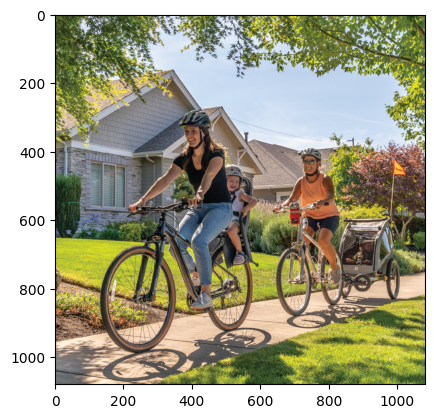

In [11]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)
image_path = 'Dash-Dlite-Mobile-1_1600x.png'
image_np = mpimg.imread(image_path)
display_image(image_np)

1080 1081 3
(238, 274) (535, 854)
(121, 542) (602, 982)
(653, 398) (833, 801)
(652, 550) (958, 884)
(647, 599) (851, 893)


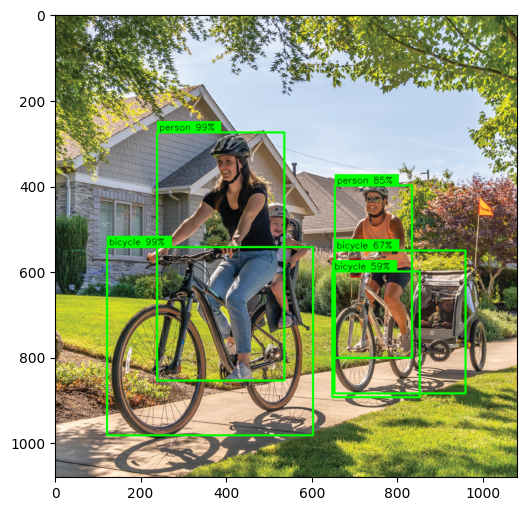

In [25]:
image_path = 'Dash-Dlite-Mobile-1_1600x.png'
image = Image.open(image_path).convert(mode='RGB')
image_np = np.array(image)
detections = detect_objects_on_image(image_np, model)
image_with_detections = draw_detections_on_image(image_np, detections, labels)
plt.figure(figsize=(8, 6))
plt.imshow(image_with_detections)

###References
- Russell, S., & Norvig, P. (2021). Artificial intelligence: A modern approach, global edition 4th. Foundations, 19, 23.
- https://www.tensorflow.org/
- https://keras.io/
- https://opencv.org/
- https://matplotlib.org/
- https://pandas.pydata.org/
- https://seaborn.pydata.org/